In [164]:
import os
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [165]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models
import time

In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
cat_directory = "/content/drive/MyDrive/cat_vs_bat/cat"  # Replace with the actual path to the "cat" directory
bat_directory = "/content/drive/MyDrive/cat_vs_bat/bat"  # Replace with the actual path to the "bat" directory


In [168]:
def extract_features(directory):
    features = []
    for filename in os.listdir(directory):
        if filename.endswith(".wav"):  # Assuming the audio files have the ".wav" extension
            file_path = os.path.join(directory, filename)
            audio, sr = librosa.load(file_path)  # Read the audio file using Librosa
            features.append((filename, audio, sr))
    return features


In [ ]:
cat_features = extract_features(cat_directory)
bat_features = extract_features(bat_directory)


In [170]:
data = cat_features + bat_features
df = pd.DataFrame(data, columns=["Filename", "Audio", "SampleRate"])

<ipython-input-171-162a4a24216e>:2: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(df.Audio[i], sr=22050,x_axis='s')


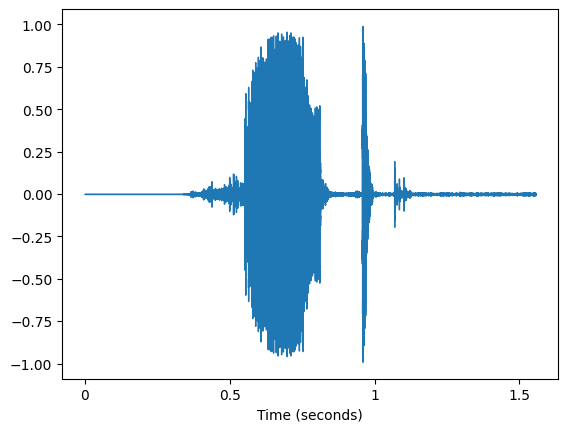

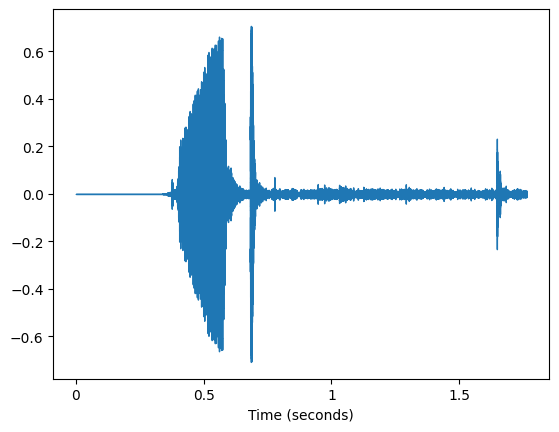

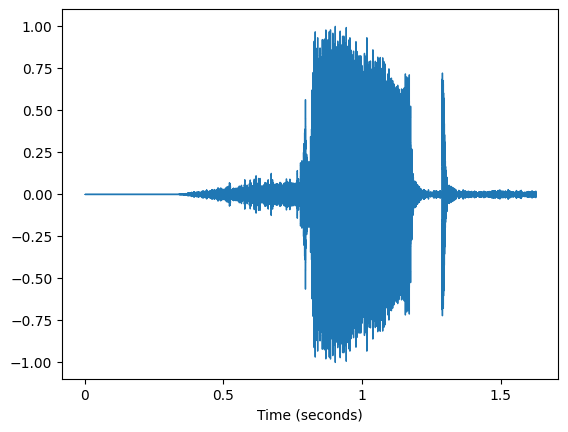

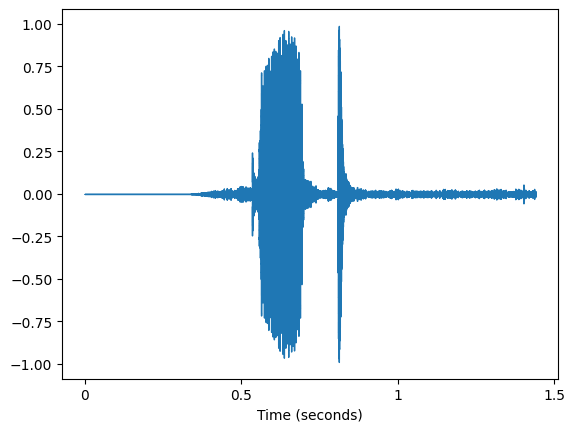

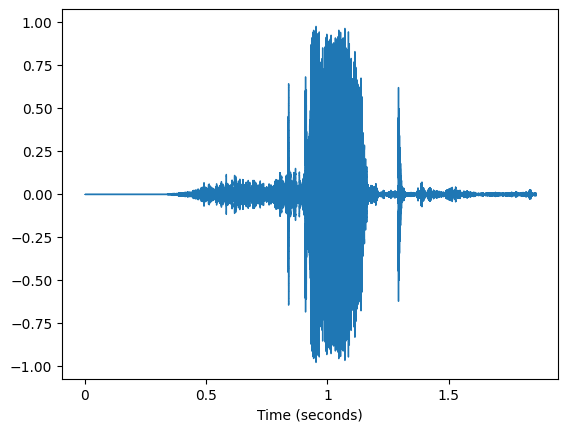

In [171]:
for i in range(5):
  librosa.display.waveshow(df.Audio[i], sr=22050,x_axis='s')
  plt.show()

In [172]:
df.Audio[9]

array([0.        , 0.        , 0.        , ..., 0.0022945 , 0.0037244 ,
       0.00469798], dtype=float32)

In [173]:
def stft_function(df):
  n_fft = 1024
  hop_length = 320

  window_type = 'hann'

  spectogram_librosa = np.abs(librosa.stft(df.Audio,n_fft=n_fft,hop_length = hop_length,
                                          win_length = n_fft,
                                          window = window_type)) ** 2
  return spectogram_librosa


In [174]:
df = pd.DataFrame(data, columns=["Filename", "Audio", "SampleRate"])

In [175]:
stft_data = []
n_fft=2048
hop_length=512

for i, row in df.iterrows():
    audio = row['Audio']
    stft = np.abs(librosa.stft(audio, n_fft=n_fft, hop_length=hop_length))
    stft_data.append(stft.T)  # Transpose the STFT to have time frames as rows


stft_df = pd.DataFrame(stft_data)
stft_df.columns = [f'Frequency_{i}' for i in range(stft_df.shape[1])]


# stft_df = pd.concat([df[['Filename', 'SampleRate']], stft_df], axis=1)




/usr/local/lib/python3.10/dist-packages/pandas/core/internals/construction.py:568: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [176]:
stft_df

,Frequency_0
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
7,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [177]:
class0 = np.zeros(10)
class1 = np.ones(10)

y = np.concatenate((class0,class1))
y


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [178]:

df.head()

,Filename,Audio,SampleRate
0,cat7.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
1,cat5.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
2,cat3.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
3,cat01.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
4,cat6.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050


In [179]:
stft_df.shape

(20, 1)

In [180]:
X_train, X_test, y_train, y_test = train_test_split(stft_df , y, test_size=0.2, random_state=42)

In [182]:
import tensorflow as tf

In [183]:
model = models.Sequential()
model.add(layers.Dense(512,input_shape=(20,),activation = 'relu'))
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [184]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
his =  model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

In [189]:
start_time = time.time()
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
end_time = time.time()
training_time = end_time - start_time

training_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
testing_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
num_params = model.count_params()